# Import libs

In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

## Teams & Data

In [ ]:
group_winners = np.array([
    ['FCB', 'GER', 'A'],
    ['RM', 'ESP', 'B'],
    ['City', 'ENG', 'C'],
    ['Liverpool', 'ENG', 'D'],
    ['Chelsea', 'ENG', 'E'],
    ['Dortmund', 'GER', 'F'],
    ['Juventus', 'ITA', 'G'],
    ['PSG', 'FRA', 'H']
])
    
group_runners = [
    ['ATM', 'ESP', 'A'],
    ['BMG', 'GER', 'B'],
    ['Porto', 'NED', 'C'],
    ['Atlanta', 'ITA', 'D'],
    ['Sevilla', 'ESP', 'E'],
    ['Lazio', 'ITA', 'F'],
    ['Barcelona', 'ESP', 'G'],
    ['Leipzig', 'GER', 'H']
]

group_winners = pd.DataFrame(group_winners, columns=["Team", "Country", "Group"])
group_runners = pd.DataFrame(group_runners, columns=["Team", "Country", "Group"])

teams = group_winners.Team.append(group_runners.Team).values

# Get all possible pairings within the rules

In [ ]:
possible_combinations = []

for i in np.arange(0,8):
    for j in np.arange(0,8):
        if group_winners.iloc[i,1] != group_runners.iloc[j,1] and group_winners.iloc[i,2] != group_runners.iloc[j,2] :
            possible_combinations.append([group_winners.iloc[i,0], group_runners.iloc[j,0]])

# Get all possible draws withing the rules

In [ ]:
possible_draws = [] 
for draw in itertools.combinations(possible_combinations, 8):
    draw_list = reduce(lambda x,y :x+y ,draw)
    draw_set = set(draw_list)
    if len(draw_set) == 16 :
        possible_draws.append(draw)
possible_draws_df = pd.DataFrame(possible_draws)
possible_draws_df.head()

# Calculate probabilities for each pair based on all possible draws

In [ ]:
def get_pair_probs(possible_draws, team1, team2):
  chances = 0
  for draw in possible_draws:
    for match in draw:
      if match[0] == team1 and match[1] == team2 or match[0] == team2 and match[1] == team1 :
        chances=chances+1

  return round(chances/len(possible_draws),3)

In [ ]:
chances_all = []

for winner in group_winners.Team:
  chances = []
  for runner in group_runners.Team:
    chances.append(get_pair_probs(possible_draws,winner,runner))
  chances_all.append(chances)

chances_all_df = pd.DataFrame(chances_all, columns=group_runners.Team.values, index=group_winners.Team.values)
chances_all_df

,ATM,BMG,Porto,Atlanta,Sevilla,Lazio,Barcelona,Leipzig
FCB,0.000,0.000,0.166,0.198,0.207,0.208,0.221,0.000
RM,0.000,0.000,0.200,0.234,0.000,0.257,0.000,0.309
City,0.142,0.180,0.000,0.123,0.132,0.131,0.137,0.156
Liverpool,0.144,0.185,0.108,0.000,0.134,0.133,0.139,0.158
Chelsea,0.145,0.185,0.109,0.126,0.000,0.135,0.139,0.161
Dortmund,0.221,0.000,0.162,0.190,0.208,0.000,0.218,0.000
Juventus,0.199,0.261,0.145,0.000,0.179,0.000,0.000,0.216
PSG,0.149,0.189,0.111,0.129,0.140,0.136,0.146,0.000


# Visualize probas with heatmap

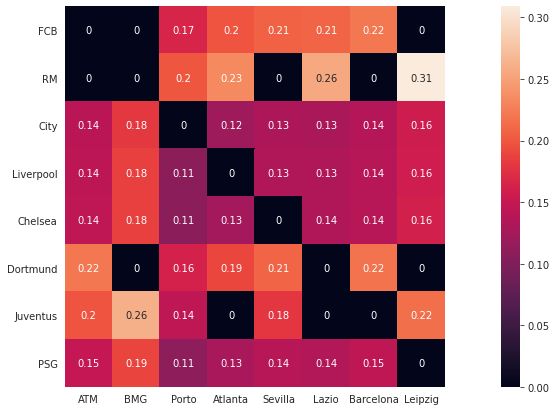

In [ ]:
#sns.heatmap(chances_all_df, vmin=0, vmax=0.5, annot=True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 7))
    ax = sns.heatmap(chances_all_df, annot=True, square=True)

# Accouting for bias in the drawing process